# Импорт сторонних библиотек

In [1]:
import pandas as pd
import missingno as msno
from matplotlib import pyplot
from scipy.stats import chi2_contingency

# Загрузка данных

In [2]:
df01 = pd.read_csv('data/ga_sessions.csv')

C:\Users\LEGION\AppData\Local\Temp\ipykernel_10516\2471262295.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df01 = pd.read_csv('data/ga_sessions.csv')


In [3]:
df01.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


In [4]:
def print_useful_rows_info(df):
    print('Количество полностью заполненных объектов из всей выборки:', 
          len(df.dropna()))
    print('Процент полностью заполненных объектов из всей выборки:', 
          round(len(df.dropna()) / len(df) * 100, 2))

In [5]:
print_useful_rows_info(df01)

Количество полностью заполненных объектов из всей выборки: 14940
Процент полностью заполненных объектов из всей выборки: 0.8


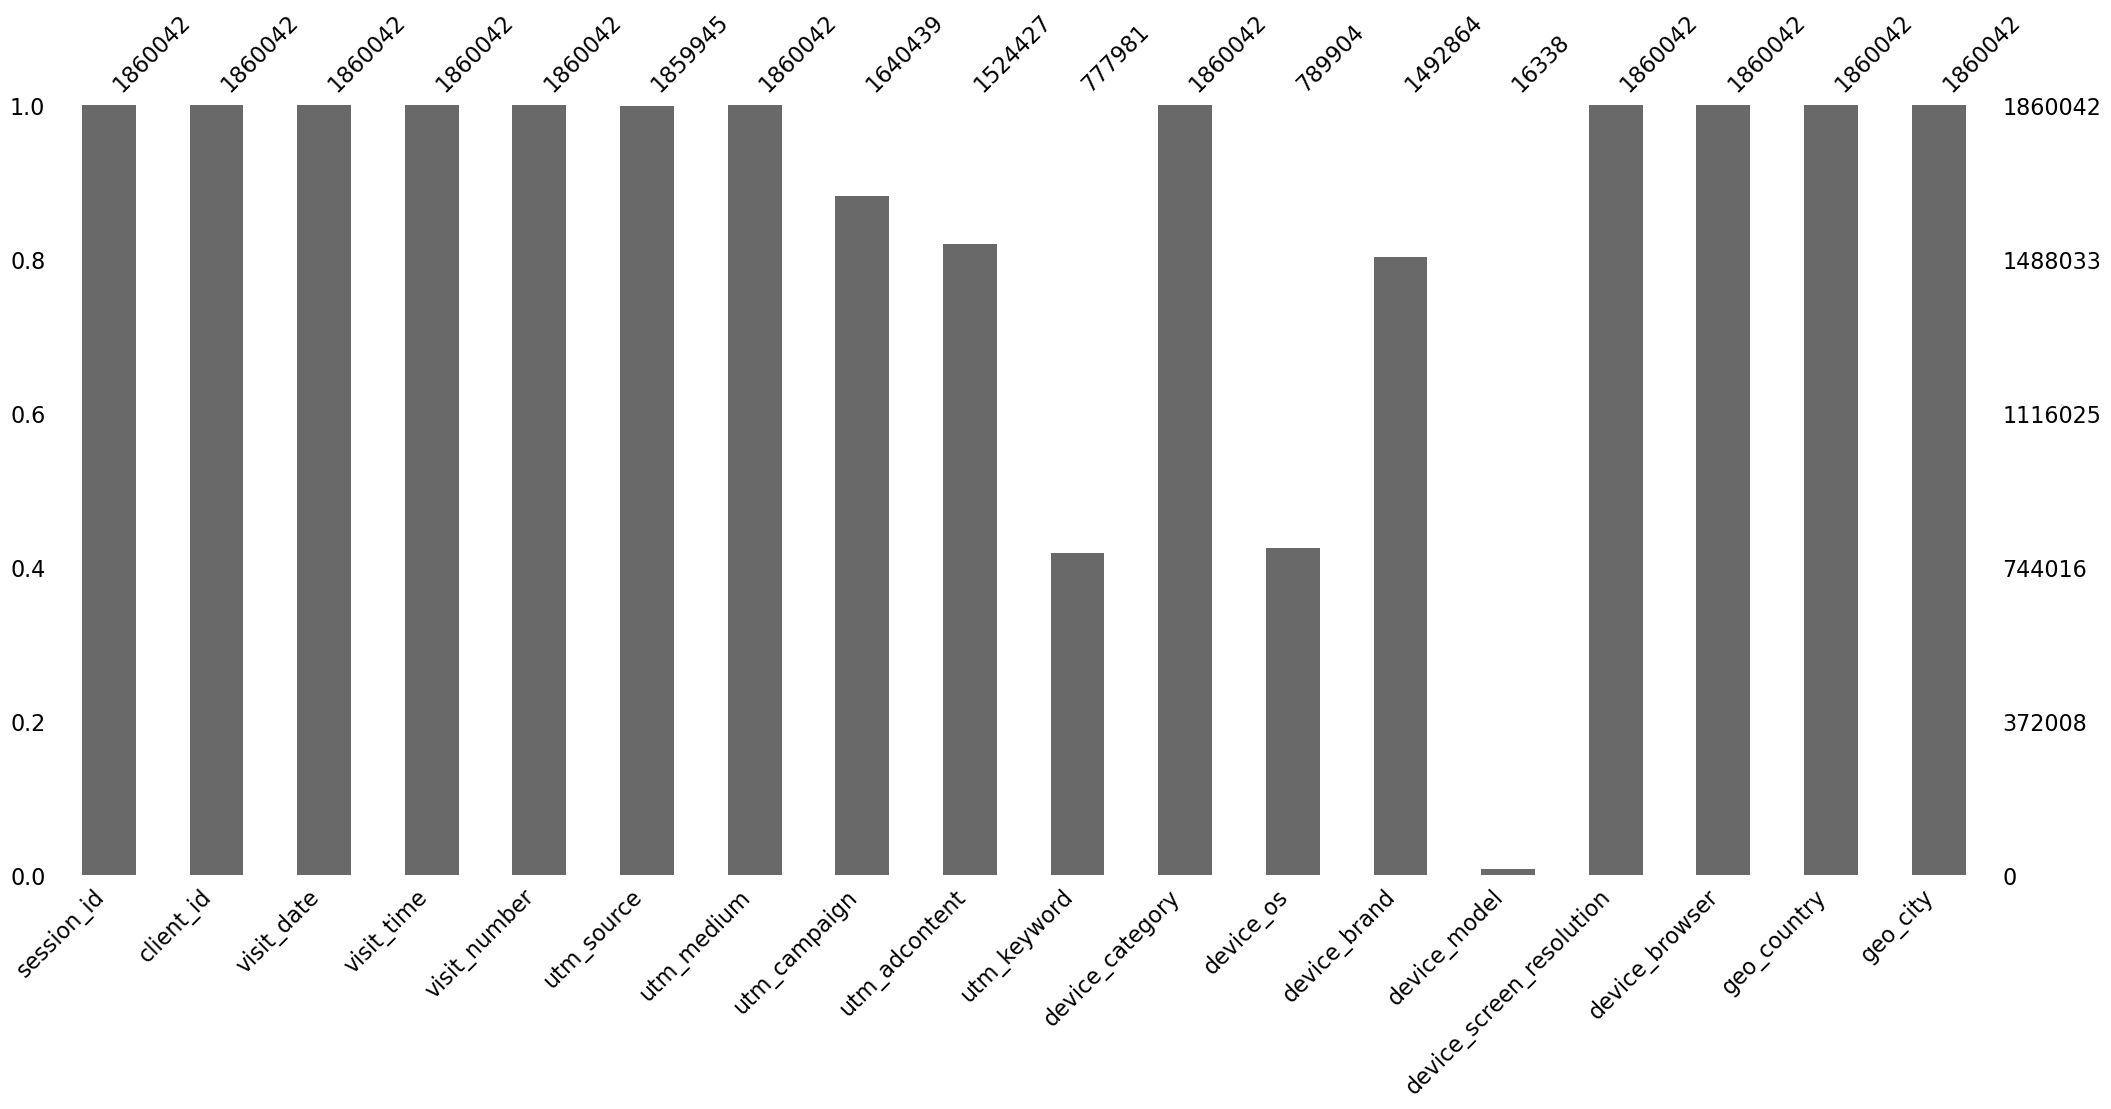

In [6]:
msno.bar(df01);

In [7]:
df02 = pd.read_csv('data/ga_hits-002.csv')

In [8]:
df02.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


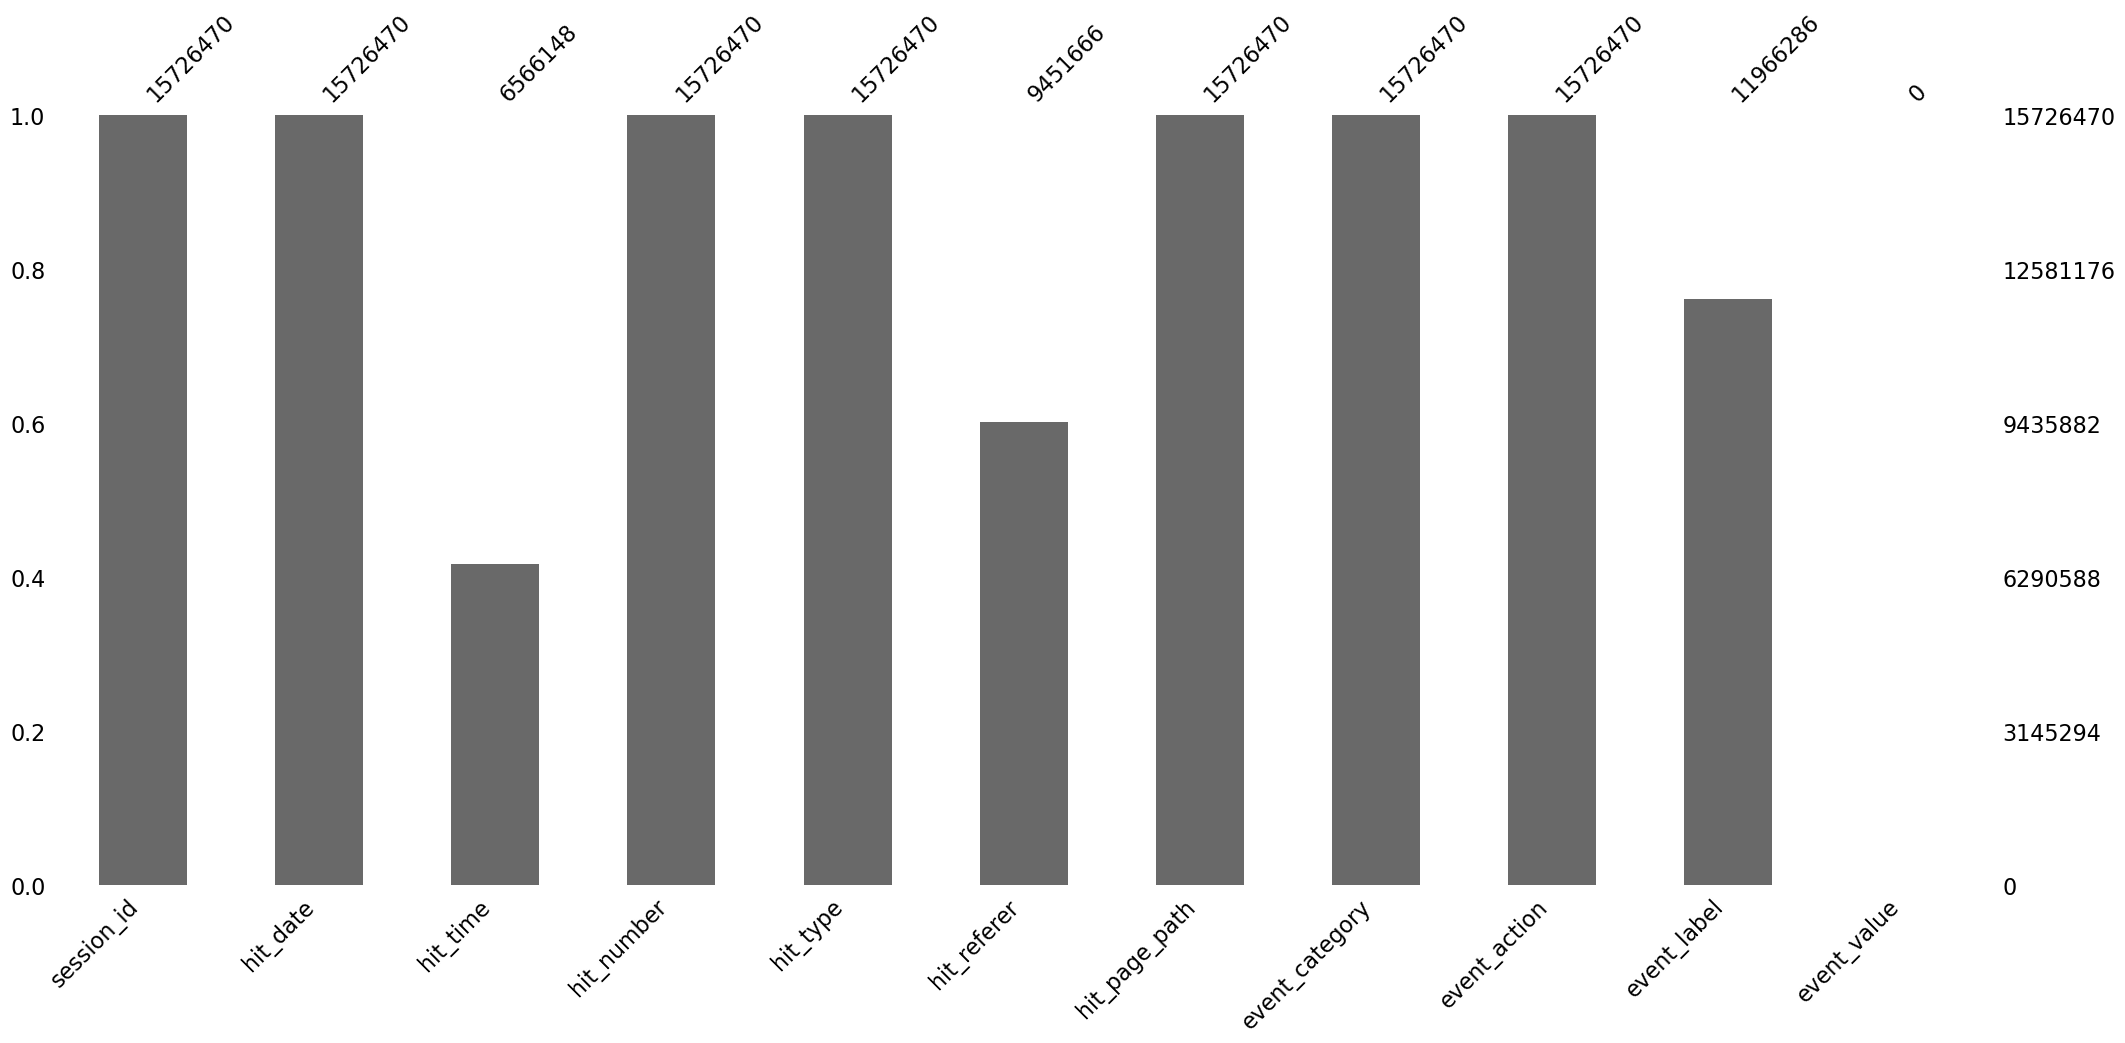

In [9]:
msno.bar(df02);

In [10]:
target_action =  ['sub_car_claim_click', 'sub_car_claim_submit_click', 
                  'sub_open_dialog_click', 'sub_custom_question_submit_click', 
                  'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success', 
                  'sub_car_request_submit_click']

In [11]:
df02['event_value'] = df02.apply(lambda x: 1 if x.event_action in target_action else 0, axis=1)

In [12]:
print_useful_rows_info(df02)

Количество полностью заполненных объектов из всей выборки: 118953
Процент полностью заполненных объектов из всей выборки: 0.76


# Data Preparation

In [13]:
df = pd.merge(df01, df02, on=['session_id'], how='right')

In [14]:
df.to_csv('df.csv', index=False)

In [2]:
df = pd.read_csv('df.csv')

C:\Users\LEGION\AppData\Local\Temp\ipykernel_9220\275008081.py:1: DtypeWarning: Columns (9,11,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('df.csv')


## Исследование данных на наличие дублирующихся значений

In [3]:
df[df.duplicated()]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,...,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value


Среди всех значений дублирующихся нет.

## Исследование данных на пропуски

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726470 entries, 0 to 15726469
Data columns (total 28 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   session_id                object 
 1   client_id                 float64
 2   visit_date                object 
 3   visit_time                object 
 4   visit_number              float64
 5   utm_source                object 
 6   utm_medium                object 
 7   utm_campaign              object 
 8   utm_adcontent             object 
 9   utm_keyword               object 
 10  device_category           object 
 11  device_os                 object 
 12  device_brand              object 
 13  device_model              object 
 14  device_screen_resolution  object 
 15  device_browser            object 
 16  geo_country               object 
 17  geo_city                  object 
 18  hit_date                  object 
 19  hit_time                  float64
 20  hit_number            

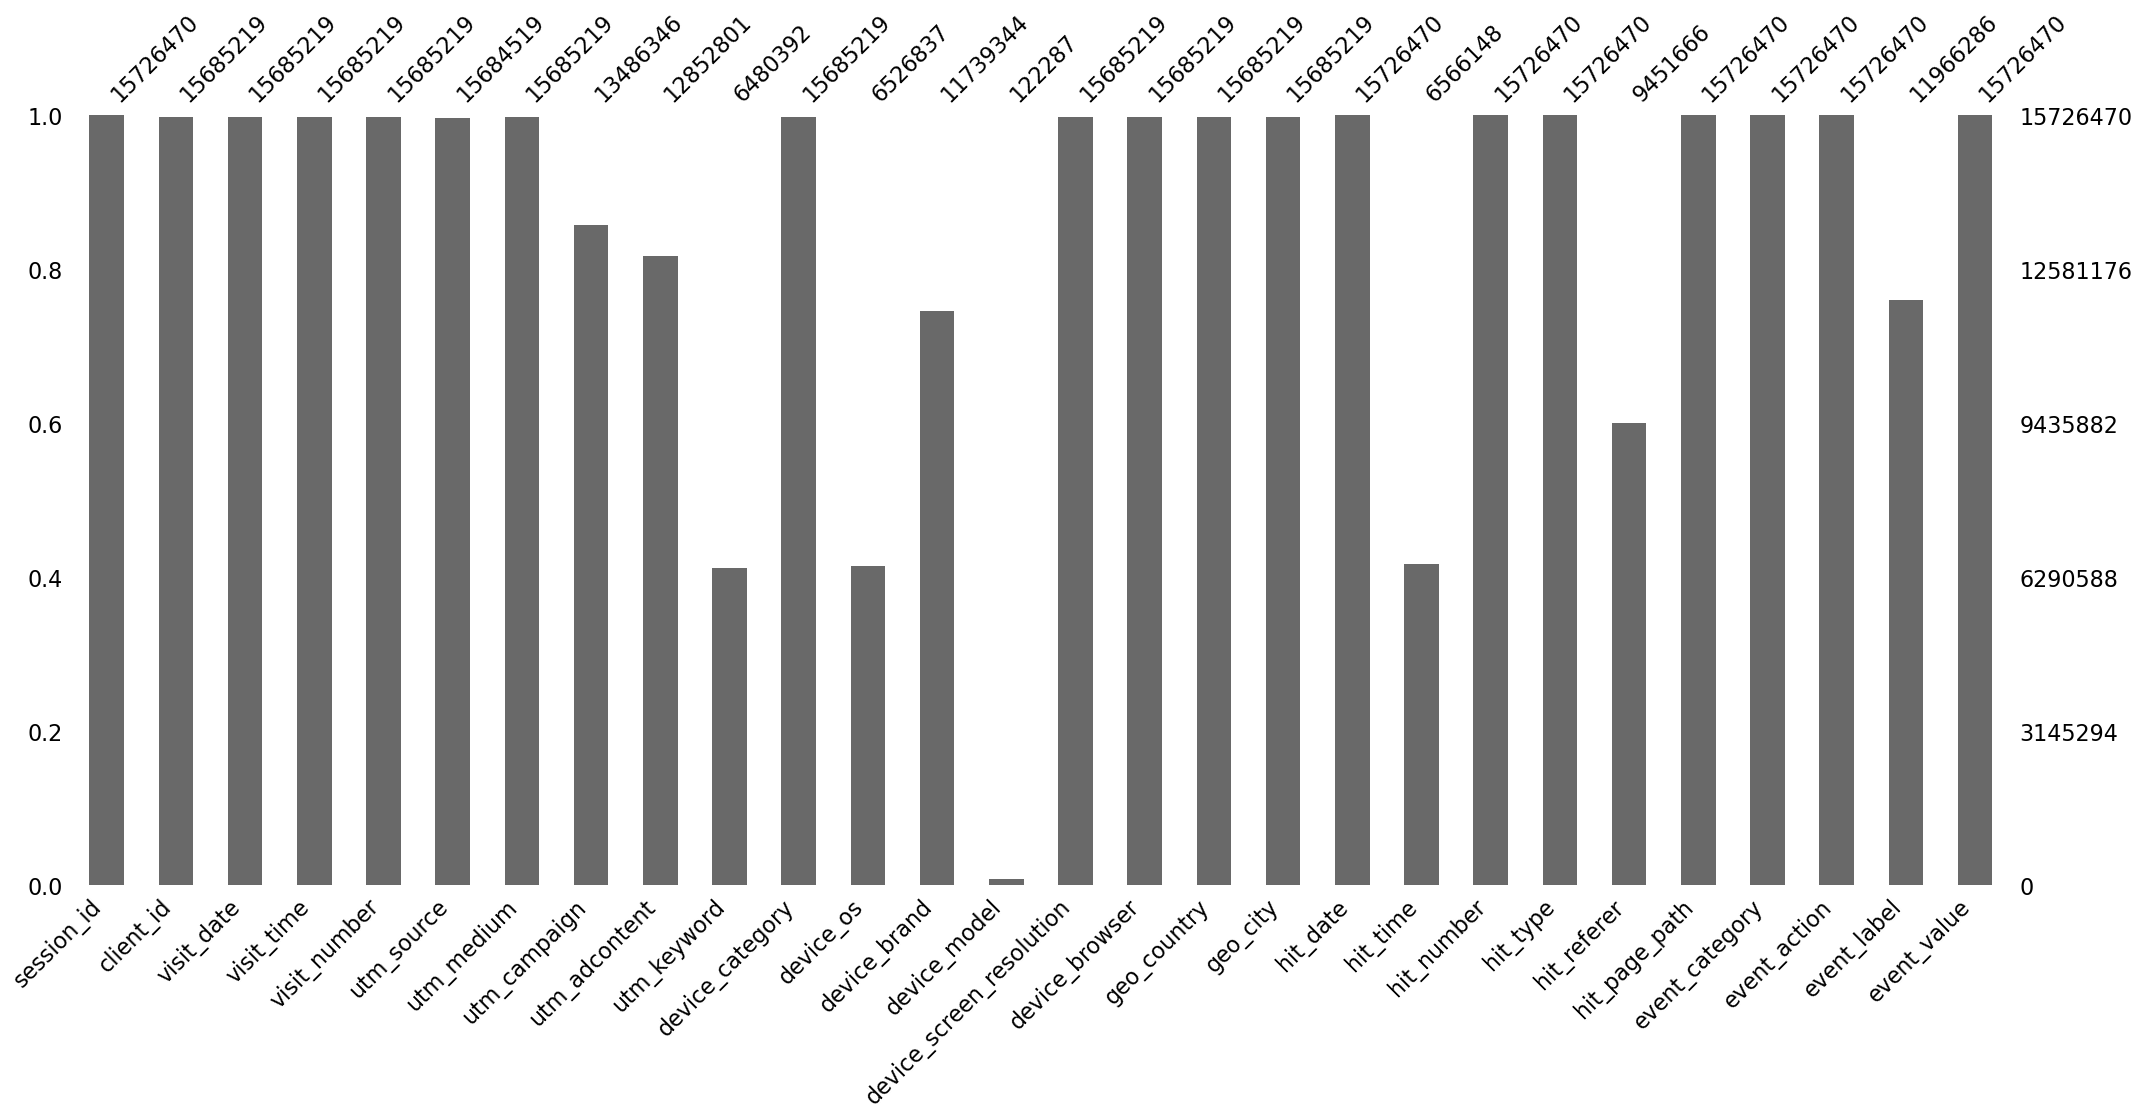

In [6]:
msno.bar(df);

In [7]:
def missing_values(df):
    print('Процент пропущенных значений:')
    print(((df.isna().sum()/len(df))*100).sort_values(ascending = False))

In [8]:
missing_values(df)

Процент пропущенных значений:
device_model                99.222413
utm_keyword                 58.793092
device_os                   58.497762
hit_time                    58.247795
hit_referer                 39.899634
device_brand                25.352962
event_label                 23.909905
utm_adcontent               18.272816
utm_campaign                14.244290
utm_source                   0.266754
device_browser               0.262303
visit_date                   0.262303
geo_city                     0.262303
geo_country                  0.262303
client_id                    0.262303
utm_medium                   0.262303
visit_time                   0.262303
device_category              0.262303
visit_number                 0.262303
device_screen_resolution     0.262303
hit_page_path                0.000000
event_action                 0.000000
event_category               0.000000
session_id                   0.000000
hit_type                     0.000000
hit_number          

In [9]:
print(df['device_model'].value_counts(dropna=False))
print(df['utm_keyword'].value_counts(dropna=False))
print(df['device_os'].value_counts(dropna=False))
print(df['hit_time'].value_counts(dropna=False))
print(df['hit_referer'].value_counts(dropna=False))
print(df['device_brand'].value_counts(dropna=False))
print(df['event_label'].value_counts(dropna=False))
print(df['utm_adcontent'].value_counts(dropna=False))
print(df['utm_campaign'].value_counts(dropna=False))

device_model
NaN                     15604183
AuMdmADEIoPXiWpTsBEj       78321
tWBQlsvNfHxRUjaPAfhd        4339
pTgAEPipQxDXCjPrJbHo        3495
cwMJxNXiWUgMUxGiCTPs        3012
                          ...   
aWSBcBZlKorTFjJGlWKG           1
qmRODeCJLlmkmwxNYXvp           1
hOhIHYHnDhUlkzDoZJdA           1
UvyzWsKbojrmlVrFRIgp           1
mhkBNBhsTwAvDUZdstnC           1
Name: count, Length: 105, dtype: int64
utm_keyword
NaN                     9246078
puhZPIYqKXeFPaUviSjo    4717082
aXQzDWsJuGXeBXexNHjc     176453
ITfrGJNwVsHBGJMAKoct     138328
UKNBOHebRIIsQRsjNKay     132629
                         ...   
AWRuffbiANmJrYMwpzNm          1
gVRrcxiDQubJiljoTbGm          1
vpQKKTAzuMqZqbIphRKd          1
LbYgXRsCfbfDfXBVePCv          1
qFcyispArlKUQmFENgzo          1
Name: count, Length: 1193, dtype: int64
device_os
NaN              9199633
Android          3433515
iOS              1735956
Windows          1015524
Macintosh         309734
Linux              30932
(not set)            

In [10]:
df = df.drop(columns=['device_model', 'utm_keyword', 'device_os', 'hit_time', 'hit_referer',
                      'device_brand', 'event_label', 'utm_adcontent', 'utm_campaign'])
#удаление неинформативных признаков, в которых пропущено более 10 % значений
df.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,device_category,device_screen_resolution,device_browser,geo_country,geo_city,hit_date,hit_number,hit_type,hit_page_path,event_category,event_action,event_value
0,5639623078712724064.1640254056.1640254056,1.313077e+09,2021-12-23,13:07:36,2.0,kjsLglQLzykiRbcDiGcD,cpc,mobile,360x780,Chrome,Russia,Saint Petersburg,2021-12-23,30,event,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,0
1,7750352294969115059.1640271109.1640271109,1.804520e+09,2021-12-23,17:51:49,2.0,ZpYIoDJMcFzVoPFsHGJL,banner,mobile,393x851,Chrome,Russia,Chelyabinsk,2021-12-23,41,event,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,0
2,885342191847998240.1640235807.1640235807,2.061348e+08,2021-12-23,08:03:27,1.0,BHcvLfOaCWvWTykYqHVe,cpc,desktop,2560x1080,Chrome,Russia,Moscow,2021-12-23,49,event,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,0
3,142526202120934167.1640211014.1640211014,3.318447e+07,2021-12-23,01:10:14,9.0,BHcvLfOaCWvWTykYqHVe,cpc,mobile,412x915,Chrome,Russia,Podolsk,2021-12-23,46,event,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,0
4,3450086108837475701.1640265078.1640265078,8.032858e+08,2021-12-23,16:11:18,1.0,fDLlAcSmythWSCVMvqvL,(none),desktop,1536x864,Chrome,Estonia,Tallinn,2021-12-23,79,event,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,0


In [11]:
print_useful_rows_info(df)

Количество полностью заполненных объектов из всей выборки: 15684519
Процент полностью заполненных объектов из всей выборки: 99.73


In [12]:
print(df['utm_source'].value_counts(dropna=False))

utm_source
ZpYIoDJMcFzVoPFsHGJL    5151702
fDLlAcSmythWSCVMvqvL    3250926
kjsLglQLzykiRbcDiGcD    1772431
bByPQxmDaMXgpHeypKSM    1341803
BHcvLfOaCWvWTykYqHVe    1231071
                         ...   
zPJpddwzkFqLMSYgtDqy          1
oBixMNCffOQtQcLCZfRN          1
OboZzsWwJIeGPLeiLGMq          1
LBaWJEeycBIqEqUqkoqw          1
gSwaXkJgHiWoIntUiupK          1
Name: count, Length: 281, dtype: int64


In [13]:
df = df[df.utm_source.notna()] #удаление записей, в которых канал привлечения не заполнен

In [14]:
df = df.drop(columns=['hit_type']) #удаление неинформативного признака, в котором единственное уникальное значение

In [15]:
missing_values(df)

Процент пропущенных значений:
session_id                  0.0
client_id                   0.0
event_action                0.0
event_category              0.0
hit_page_path               0.0
hit_number                  0.0
hit_date                    0.0
geo_city                    0.0
geo_country                 0.0
device_browser              0.0
device_screen_resolution    0.0
device_category             0.0
utm_medium                  0.0
utm_source                  0.0
visit_number                0.0
visit_time                  0.0
visit_date                  0.0
event_value                 0.0
dtype: float64


In [16]:
print_useful_rows_info(df)

Количество полностью заполненных объектов из всей выборки: 15684519
Процент полностью заполненных объектов из всей выборки: 100.0


## Приведение типов данных

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15684519 entries, 0 to 15726469
Data columns (total 18 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   session_id                object 
 1   client_id                 float64
 2   visit_date                object 
 3   visit_time                object 
 4   visit_number              float64
 5   utm_source                object 
 6   utm_medium                object 
 7   device_category           object 
 8   device_screen_resolution  object 
 9   device_browser            object 
 10  geo_country               object 
 11  geo_city                  object 
 12  hit_date                  object 
 13  hit_number                int64  
 14  hit_page_path             object 
 15  event_category            object 
 16  event_action              object 
 17  event_value               int64  
dtypes: float64(2), int64(2), object(14)
memory usage: 2.2+ GB


In [18]:
df['visit_date'] = pd.to_datetime(df['visit_date']) #приведение колонки дата визита к типу данных datetime

In [19]:
df['visit_number'] = df['visit_number'].astype(int) #приведение типа данных колонки порядковый номер визита клиента к целому значению

In [20]:
df['hit_date'] = pd.to_datetime(df['hit_date']) #приведение колонки дата события к типу данных datetime

In [21]:
df.to_csv('df.csv', index=False)

## DA

In [22]:
df.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,device_category,device_screen_resolution,device_browser,geo_country,geo_city,hit_date,hit_number,hit_page_path,event_category,event_action,event_value
0,5639623078712724064.1640254056.1640254056,1.313077e+09,2021-12-23,13:07:36,2,kjsLglQLzykiRbcDiGcD,cpc,mobile,360x780,Chrome,Russia,Saint Petersburg,2021-12-23,30,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,0
1,7750352294969115059.1640271109.1640271109,1.804520e+09,2021-12-23,17:51:49,2,ZpYIoDJMcFzVoPFsHGJL,banner,mobile,393x851,Chrome,Russia,Chelyabinsk,2021-12-23,41,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,0
2,885342191847998240.1640235807.1640235807,2.061348e+08,2021-12-23,08:03:27,1,BHcvLfOaCWvWTykYqHVe,cpc,desktop,2560x1080,Chrome,Russia,Moscow,2021-12-23,49,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,0
3,142526202120934167.1640211014.1640211014,3.318447e+07,2021-12-23,01:10:14,9,BHcvLfOaCWvWTykYqHVe,cpc,mobile,412x915,Chrome,Russia,Podolsk,2021-12-23,46,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,0
4,3450086108837475701.1640265078.1640265078,8.032858e+08,2021-12-23,16:11:18,1,fDLlAcSmythWSCVMvqvL,(none),desktop,1536x864,Chrome,Estonia,Tallinn,2021-12-23,79,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,0


### Проверка гипотез

#### 1

Нулевая гипотеза: Органический трафик не отличается от платного с точки зрения CR (Conversion Rate) в целевые события. Альтернативная гипотеза: Органический трафик отличается от платного с точки зрения CR (Conversion Rate) в целевые события.

Органический трафик — все визиты с ga_sessions.utm_medium in ('organic', 
'referral', '(none)').

In [23]:
organic_traffic = ['organic', 'referral', '(none)']

In [24]:
df['traffic'] = df.apply(lambda x: 'organic' if x.utm_medium in organic_traffic else 'paid', axis=1)

In [25]:
data1 = df.groupby([df.traffic, df.event_value]).session_id.nunique()

In [26]:
data1

traffic  event_value
organic  0               468599
         1                20812
paid     0              1262985
         1                29497
Name: session_id, dtype: int64

Данные качественные бинарные. Количество групп - 2 несвязанные группы. Соответственно статистический критерий - хи-квадрат Пирсона.

In [27]:
def hypothesis_testing(a, b, c, d):
    table = [[a, b], [c, d]]
    stat, p, dof, expected = chi2_contingency(table)
 
    alpha = 0.05
    print("p-value = " + str(p))
    if p <= alpha:
        print('Отвергаем нулевую гипотезу, принимаем альтернативную гипотезу.')
    else:
        print('Нулевую гипотезу отклонить нельзя при заданном уровне значимости.')

In [28]:
hypothesis_testing(data1[0], data1[1], data1[2], data1[3])

p-value = 0.0
Отвергаем нулевую гипотезу, принимаем альтернативную гипотезу.


Вывод: Органический трафик отличается от платного с точки зрения CR (Conversion Rate) в целевые события.

#### 2

Нулевая гипотеза: Трафик с мобильных устройств не отличается от трафика с десктопных устройств с точки зрения CR (Conversion Rate) в целевые события.
Альтернативная гипотеза: Трафик с мобильных устройств отличается от трафика с десктопных устройств с точки зрения CR (Conversion Rate) в целевые события.

In [29]:
df.device_category.value_counts()

device_category
mobile     11595375
desktop     3944720
tablet       144424
Name: count, dtype: int64

In [30]:
df['device_type'] = df.apply(lambda x: 'desktop' if x.device_category == 'desktop' else 'mobile', axis=1)

In [31]:
data2 = df.groupby([df.device_type, df.event_value]).session_id.nunique()

In [32]:
data2

device_type  event_value
desktop      0               346532
             1                11510
mobile       0              1385052
             1                38799
Name: session_id, dtype: int64

In [33]:
hypothesis_testing(data2[0], data2[1], data2[2], data2[3])

p-value = 2.649896017647588e-56
Отвергаем нулевую гипотезу, принимаем альтернативную гипотезу.


Вывод: Трафик с мобильных устройств отличается от трафика с десктопных устройств с точки зрения CR (Conversion Rate) в целевые события.

#### 3

Нулевая гипотеза:  Трафик из городов присутствия (Москва и область, Санкт-Петербург) не отличается от трафика из иных регионов с точки зрения CR (Conversion Rate) в целевые события.
Альтернативная гипотеза: Трафик из городов присутствия (Москва и область, Санкт-Петербург) отличается от трафика из иных регионов с точки зрения CR (Conversion Rate) в целевые события.

In [34]:
cities_of_presence = ['Moscow', 'Saint Petersburg', 'Aprelevka', 'Balashikha', 'Beloozyorsky',
                      'Bronnitsy', 'Vereya', 'Vidnoye', 'Volokolamsk', 'Voskresensk',
                      'Vysokovsk', 'Golitsyno', 'Dedovsk', 'Dzerzhinsky', 'Dmitrov',
                      'Dolgoprudny', 'Domodedovo', 'Drezna', 'Dubna', 'Yegoryevsk',
                      'Zhukovsky', 'Zaraysk', 'Zvenigorod', 'Ivanteyevka', 'Istra',
                      'Kashira', 'Klin', 'Kolomna', 'Korolev', 'Kotelniki',
                      'Krasnoarmeysk', 'Krasnogorsk', 'Krasnozavodsk', 'Krasnoznamensk', 'Kubinka',
                      'Kurovskoye', 'Likino-Dulyovo', 'Lobnya', 'Losino-Petrovsky', 'Lukhovitsy',
                      'Lytkarino', 'Lyubertsy', 'Mozhaysk', 'Mytishchi', 'Naro-Fominsk',
                      'Noginsk', 'Odintsovo', 'Ozyory', 'Orekhovo-Zuyevo', 'Pavlovsky Posad',
                      'Peresvet', 'Podolsk', 'Protvino', 'Pushkino', 'Pushchino',
                      'Ramenskoye', 'Reutov', 'Roshal', 'Ruza', 'Sergiyev Posad',
                      'Serpukhov', 'Solnechnogorsk', 'Staraya Kupavna', 'Stupino', 'Taldom',
                      'Fryazino', 'Khimki', 'Khotkovo', 'Chernogolovka', 'Chekhov',
                      'Shatura', 'Shchyolkovo', 'Elektrogorsk', 'Elektrostal', 'Elektrougli',
                      'Yakhroma']

In [35]:
df['city'] = df.apply(lambda x: 'city of presence' if x.geo_city in cities_of_presence else 'other', axis=1)

In [36]:
data3 = df.groupby([df.city, df.event_value]).session_id.nunique()

In [37]:
data3

city              event_value
city of presence  0              1119038
                  1                33495
other             0               612546
                  1                16814
Name: session_id, dtype: int64

In [38]:
hypothesis_testing(data3[0], data3[1], data3[2], data3[3])

p-value = 1.6864183084229016e-19
Отвергаем нулевую гипотезу, принимаем альтернативную гипотезу.


Вывод: Трафик из городов присутствия (Москва и область, Санкт-Петербург) отличается от трафика из иных регионов с точки зрения CR (Conversion Rate) в целевые события.

### Ответы на вопросы продуктовой команды

#### 1

 Из каких источников / кампаний / устройств / локаций к нам идёт самый целевой трафик (и с точки зрения объёма трафика, и с точки зрения CR)?

In [39]:
df.groupby(['event_value', 'traffic', 'device_type' ,'city']).session_id.nunique()

event_value  traffic  device_type  city            
0            organic  desktop      city of presence    100546
                                   other                60953
                      mobile       city of presence    203571
                                   other               103529
             paid     desktop      city of presence    135793
                                   other                49240
                      mobile       city of presence    679128
                                   other               398824
1            organic  desktop      city of presence      5445
                                   other                 2753
                      mobile       city of presence      8313
                                   other                 4301
             paid     desktop      city of presence      2725
                                   other                  587
                      mobile       city of presence     17012
                  

In [40]:
df.groupby(['event_value', 'traffic']).session_id.nunique()

event_value  traffic
0            organic     468599
             paid       1262985
1            organic      20812
             paid         29497
Name: session_id, dtype: int64

In [41]:
df.groupby(['event_value', 'traffic']).session_id.nunique()/df.groupby(['traffic']).session_id.nunique()*100

event_value  traffic
0            organic    99.931545
             paid       99.977440
1            organic     4.438284
             paid        2.334972
Name: session_id, dtype: float64

In [42]:
df.groupby(['event_value', 'device_type']).session_id.nunique()

event_value  device_type
0            desktop         346532
             mobile         1385052
1            desktop          11510
             mobile           38799
Name: session_id, dtype: int64

In [43]:
df.groupby(['event_value', 'device_type']).session_id.nunique()/df.groupby(['device_type']).session_id.nunique()*100

event_value  device_type
0            desktop        99.910334
             mobile         99.978706
1            desktop         3.318504
             mobile          2.800670
Name: session_id, dtype: float64

In [44]:
df.groupby(['event_value', 'city']).session_id.nunique()

event_value  city            
0            city of presence    1119038
             other                612546
1            city of presence      33495
             other                 16814
Name: session_id, dtype: int64

In [45]:
df.groupby(['event_value', 'city']).session_id.nunique()/df.groupby(['city']).session_id.nunique()*100

event_value  city            
0            city of presence    99.958821
             other               99.976334
1            city of presence     2.991963
             other                2.744287
Name: session_id, dtype: float64

С точки зрения объема трафика самый целевой трафик к нам идет по платному трафику через мобильные устройства из городов присутствия.
С точки зрения CR - по органическому трафику с десктопных устройств из городов присутствия.

#### 2

 Какие авто пользуются наибольшим спросом? У каких авто самый лучший показатель CR (Conversion Rate) в целевые события?

In [46]:
df.hit_page_path

0           sberauto.com/cars?utm_source_initial=google&ut...
1           sberauto.com/cars/fiat?city=1&city=18&rental_c...
2           sberauto.com/cars/all/volkswagen/polo/e994838f...
3           sberauto.com/cars?utm_source_initial=yandex&ut...
4           sberauto.com/cars/all/mercedes-benz/cla-klasse...
                                  ...                        
15726465    sberauto.com/cars/all/toyota/fortuner/24cb5af2...
15726466    sberauto.com/cars/all/mercedes-benz/gla-klasse...
15726467    sberauto.com/cars/all/toyota/alphard/2ebe4871?...
15726468    sberauto.com/cars/all/bmw/x3/6a660f0a?rental_p...
15726469    sberauto.com/cars/all/bmw/7-serii/399ac530?utm...
Name: hit_page_path, Length: 15684519, dtype: object

In [47]:
df1 = df[df.hit_page_path.str.contains('sberauto.com/cars/all/')]

In [48]:
df1

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,device_category,device_screen_resolution,device_browser,...,geo_city,hit_date,hit_number,hit_page_path,event_category,event_action,event_value,traffic,device_type,city
2,885342191847998240.1640235807.1640235807,2.061348e+08,2021-12-23,08:03:27,1,BHcvLfOaCWvWTykYqHVe,cpc,desktop,2560x1080,Chrome,...,Moscow,2021-12-23,49,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,0,paid,desktop,city of presence
4,3450086108837475701.1640265078.1640265078,8.032858e+08,2021-12-23,16:11:18,1,fDLlAcSmythWSCVMvqvL,(none),desktop,1536x864,Chrome,...,Tallinn,2021-12-23,79,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,0,organic,desktop,other
7,4024492994895054107.1640269084.1640269084,9.370253e+08,2021-12-23,17:18:04,1,fDLlAcSmythWSCVMvqvL,(none),desktop,1536x864,Chrome,...,Ulyanovsk,2021-12-23,85,sberauto.com/cars/all/mercedes-benz/glc/f8f330...,quiz,quiz_show,0,organic,desktop,other
8,555009234841130092.1640256620.1640256620,1.292232e+08,2021-12-23,13:50:20,1,vFcAhRxLfOWKhvxjELkx,organic,desktop,1920x1080,Chrome,...,Saint Petersburg,2021-12-23,101,sberauto.com/cars/all/kia/sorento/c38179cb?utm...,quiz,quiz_show,0,organic,desktop,city of presence
9,2692901778487480807.1640206845.1640206845,6.269901e+08,2021-12-23,00:00:45,4,kjsLglQLzykiRbcDiGcD,cpc,mobile,414x896,Safari,...,Moscow,2021-12-23,1,sberauto.com/cars/all/nissan/x-trail/0744675f?...,card_web,view_card,0,paid,mobile,city of presence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15726465,6866159858916559617.1640270865.1640270865,1.598652e+09,2021-12-23,17:47:45,2,kjsLglQLzykiRbcDiGcD,cpc,desktop,1920x1080,Chrome,...,Moscow,2021-12-23,43,sberauto.com/cars/all/toyota/fortuner/24cb5af2...,quiz,quiz_show,0,paid,desktop,city of presence
15726466,7310304587364460692.1640261783.1640261783,1.702063e+09,2021-12-23,15:16:23,2,kjsLglQLzykiRbcDiGcD,cpc,mobile,375x812,Safari,...,Moscow,2021-12-23,40,sberauto.com/cars/all/mercedes-benz/gla-klasse...,quiz,quiz_show,0,paid,mobile,city of presence
15726467,8013702685784312179.1640270195.1640270195,1.865836e+09,2021-12-23,17:36:35,1,IZEXUFLARCUMynmHNBGo,blogger_channel,mobile,390x844,YaBrowser,...,Yablonovsky,2021-12-23,43,sberauto.com/cars/all/toyota/alphard/2ebe4871?...,quiz,quiz_show,0,paid,mobile,other
15726468,8021505554734405918.1640257821.1640257821,1.867652e+09,2021-12-23,14:10:21,1,kjsLglQLzykiRbcDiGcD,cpc,mobile,390x844,Chrome,...,Aprelevka,2021-12-23,45,sberauto.com/cars/all/bmw/x3/6a660f0a?rental_p...,quiz,quiz_show,0,paid,mobile,city of presence


In [49]:
cars = df1.hit_page_path.str.split('/').str[3].unique()

In [50]:
def find_model(str):
    model = 'unknown'
    for car in cars:
        if car in str:
            model = car
    return model
df['car_model'] = df.hit_page_path.apply(lambda x : find_model(x))

In [51]:
df.groupby(['event_value', 'car_model']).session_id.nunique()

event_value  car_model    
0            audi                8289
             bmw                23396
             haval               6571
             hyundai             2405
             kia                28724
             lada-vaz           49588
             land-rover          3561
             lexus               8545
             mercedes-benz      52500
             mini                5069
             nissan             43407
             peugeot             3666
             porsche             8576
             renault            20164
             skoda              88732
             toyota             20648
             unknown          1641669
             volkswagen         52957
             volvo               7061
1            audi                  86
             bmw                  382
             haval                229
             hyundai              129
             kia                 1227
             lada-vaz            2423
             land-rover

In [52]:
df.groupby(['event_value', 'car_model']).session_id.nunique()/df.groupby(['car_model']).session_id.nunique()*100

event_value  car_model    
0            audi              99.951767
             bmw               99.970089
             haval             99.969572
             hyundai           99.585921
             kia               99.926944
             lada-vaz          99.963714
             land-rover        99.971926
             lexus             99.988299
             mercedes-benz     99.977148
             mini              99.940852
             nissan            99.986179
             peugeot           99.972730
             porsche          100.000000
             renault           99.985124
             skoda             99.979718
             toyota            99.951593
             unknown           99.967787
             volkswagen        99.977345
             volvo             99.985840
1            audi               1.037019
             bmw                1.632269
             haval              3.483949
             hyundai            5.341615
             kia              

Наибольшим спросом пользуются skoda, lada-vaz, volkswagen.
Самый лучший показатель CR (Conversion Rate) в целевые события у hyundai, lada-vaz, volkswagen.

#### 3

 Стоит ли нам увеличивать своё присутствие в соцсетях и давать там больше рекламы?

Реклама в социальных сетях — все визиты с ga_sessions.utm_source in ('QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt', 'ISrKoXQCxqqYvAZICvjs', IZEXUFLARCUMynmHNBGo', 'PlbkrSYoHuZBWfYjYnfw', 'gVRrcxiDQubJiljoTbGm').

In [53]:
utm_source_social_network = ['QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt', 'ISrKoXQCxqqYvAZICvjs', 
                             'IZEXUFLARCUMynmHNBGo', 'PlbkrSYoHuZBWfYjYnfw', 'gVRrcxiDQubJiljoTbGm']

In [54]:
df['social_network'] = df.apply(lambda x: 'yes' if x.utm_source in utm_source_social_network else 'no', axis=1)

In [55]:
df.groupby(['event_value', 'social_network']).session_id.nunique()

event_value  social_network
0            no                1475347
             yes                256237
1            no                  46288
             yes                  4021
Name: session_id, dtype: int64

In [56]:
df.groupby(['event_value', 'social_network']).session_id.nunique()/df.groupby(['social_network']).session_id.nunique()*100

event_value  social_network
0            no                99.961854
             yes               99.983221
1            no                 3.136235
             yes                1.568987
Name: session_id, dtype: float64

In [57]:
df.groupby(['event_value', 'social_network', 'utm_medium']).session_id.nunique()

event_value  social_network  utm_medium
0            no              (none)        276890
                             (not set)        361
                             app             1211
                             article           15
                             banner        525182
                                            ...  
1            yes             cpm             2363
                             cpv              115
                             post              54
                             referral          80
                             smm               60
Name: session_id, Length: 95, dtype: int64

In [58]:
df.groupby(['event_value', 'social_network', 'utm_medium']).session_id.nunique()/df.groupby(['utm_medium']).session_id.nunique()*100

event_value  social_network  utm_medium
0            no              (none)         99.938641
                             (not set)      95.502646
                             app           100.000000
                             article       100.000000
                             banner         99.995430
                                              ...    
1            yes             cpm             1.028326
                             cpv             1.471529
                             post            2.424787
                             referral        0.058458
                             smm             5.025126
Name: session_id, Length: 95, dtype: float64

На данный момент 17 % трафика (8 % целевого трафика) приходит к нам благодаря присутствию в социальных сетях, CR составляет 1,6 %. На мой взгляд, нам стоит увеличивать своё присутствие в соцсетях и давать там больше рекламы. При этом стоит рассмотреть более подробно уже имеющиеся результаты присутствия в соцсетях.
Так наибольший объем целевого трафика пришел благодаря cpm, CR составляет 1,03 %. Cpv - 115 целевых визитов, CR - 1,5 %. Возможно стоит отдельно по каналам изучить, какие каналы были более эффективны, а какие менее. Вероятно в каких-то каналах меньше нашей целевой аудитории (по возрасту, полу, региону (так ранее было замечено, что основной целевой трафик идет из городов присутствия), интересы и так далее).
Пост - 54 целевых визита, CR - 2,42 %. Необходимо оценить посты в каких пабликах были более эффективны, а в каких менее. Также стоит проанализировать активность аудитории в разное время публикации.
Smm - 60 целевых визита, CR - 5,02 %. Оцениваем какие социальные площадки более эффективны. Возможно не учтены особенности социальных сетей (визуальная составляющая, текст, качество видео, качество звука, длительность видео и так далее).